<a href="https://colab.research.google.com/github/deakristina27/Data-Mining-CS-3-Grup-B-/blob/main/Data_Mining_CS3_(Grup_B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Market Basket Analysis Toko AlfaIndo Cabang UI Depok**

AlfaIndo adalah sebuah toko waralaba yang memiliki beberapa cabang di kota-kota besar di Indonesia seperti Jakarta, Depok, Surabaya, dan Medan. Anda adalah seorang Data Analyst yang bekerja di kantor pusat AlfaIndo di Jakarta. Pasca masa pandemi Toko AlfaIndo cabang UI Depok mengalami penurunan laba yang signifikan. Anda ditugaskan oleh pimpinan untuk membantu toko ALfaIndo cabang UI Depok untuk bangkit dari keterpurukannya.

Kelompok B (Kelas A): 
1. Chika ramadhani 1906374004
2. Cindy Fara Nabila (2006463774)
3. Daffi Farhansyah Kurnia (1906375833)
4. Dea Kristina (1906354053)
5. Hana Adzania Nufaisah (1906377776)
6. Salsabil Felia Armansyah (1806185815)
7. Zhafirah Tsany (2006572951)


Pertama-tama, akan dilakukan data pre-processing dengan mengisi nilai-nilai kolom yang kosong pada excel karena diasumsikan data dalam bentuk data stack (berkelompok). Lalu setelah itu, dilakukan perubahan format tanggal dari bentuk *long date* (02/07/2022  00:00:00) menjadi *short date* (02/07/2022)

In [2]:
# Warning install "mlxtend" module first. Jalankan cell ini Hanya jika menggunakan Google Colaboratory:
# Jika menggunakan Jupyter notebook secara lokal (e.g. Anaconda/WinPython) silahkan install lewat terminal (e.g. command prompt)
try:
    import google.colab as gc_
    print("Running the code in Google Colab.", gc_) #IN_COLAB = True
    print("Installing required Module, please wait ... ")
    !pip install mlxtend 
    !pip install pycaret
except:
    print("Running the code locally, make sure to install required modules.")#IN_COLAB = False

Running the code in Google Colab. <module 'google.colab' from '/usr/local/lib/python3.7/dist-packages/google/colab/__init__.py'>
Installing required Module, please wait ... 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from pycaret.arules import *

%matplotlib inline
plt.style.use('bmh'); sns.set()

In [4]:
# Import Data Set from GitHub
df = pd.read_csv('https://raw.githubusercontent.com/deakristina27/Data-Mining-CS-3-Grup-B-/main/Kasus-AR-MBA-Ganjil-2022.csv', low_memory = False, encoding = 'utf8', delimiter=";")
df.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,01/07/2022,Mr. A,1,Roti,Sri Roti,2
1,1,01/07/2022,Mr. A,2,Air Minum,Aquos,1
2,1,01/07/2022,Mr. A,11,Mie Instan,Indomi,2
3,1,01/07/2022,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,01/07/2022,Mr. B,2,Air Minum,Aquos,1


In [5]:
### Change date format 
df["Tanggal"] = pd.to_datetime(df["Tanggal"], format = "%d/%m/%Y")
df

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,2022-07-01,Mr. A,1,Roti,Sri Roti,2
1,1,2022-07-01,Mr. A,2,Air Minum,Aquos,1
2,1,2022-07-01,Mr. A,11,Mie Instan,Indomi,2
3,1,2022-07-01,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,2022-07-01,Mr. B,2,Air Minum,Aquos,1
5,2,2022-07-01,Mr. B,6,Snack,Chiki,2
6,2,2022-07-01,Mr. B,3,Roti,Prambanan,1
7,2,2022-07-01,Mr. B,5,Shampoo,Clean,1
8,3,2022-07-02,Mr. C,4,Sabun,Lifboy,1
9,3,2022-07-02,Mr. C,5,Shampoo,Clean,1


Berikut adalah cuplikan data yang kami gunakan. Dari data berikut tidak ada data yang hilang / (*missing*), dan semua ID produk, Nama Produk, dan Merek sesusai dengan keterangan yang diberikan. 
Dataset yang dimiliki oleh toko Alfando cabang Depok sudah cukup baik, namun perlu perbaikan dari sisi ID Transaksi, Tanggal, dan Konsumen agar dicatat semua pada setiap transaksi barang. Hal ini dapat memudahkan untuk *tracking* data kedepannya data menjadi lebih baik. 

# Visualisasi Data (EDA) 

Pada data transaksi toko Alfando (bulan Juli - Oktober), terdapat beberapa produk yang memiliki dua merek pada toko Alfando. Akan dilihat kecenderungan pembeli dari toko Alfando. 
Berikut adalah perbandingan penjualan produk yang memiliki dua merek yang diperdagangkan pada supermarket tersebut. 

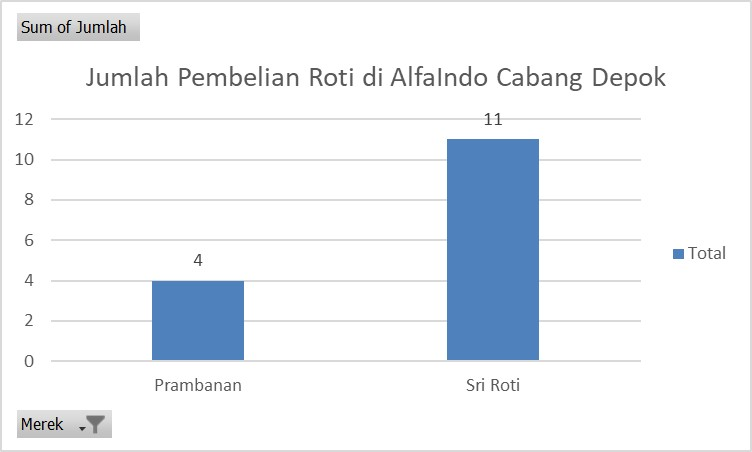

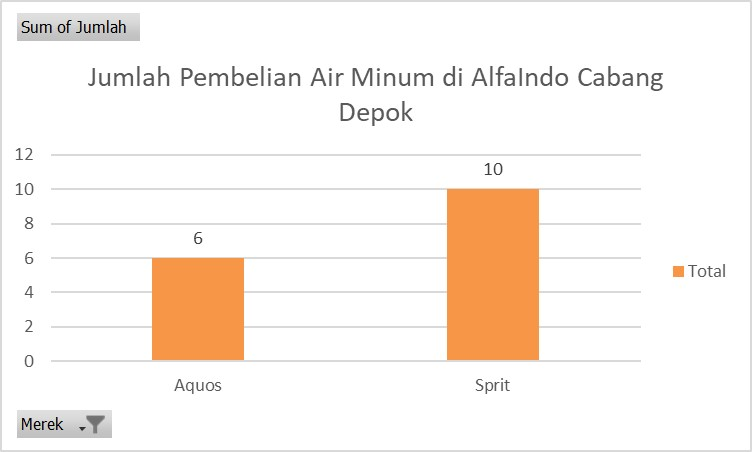

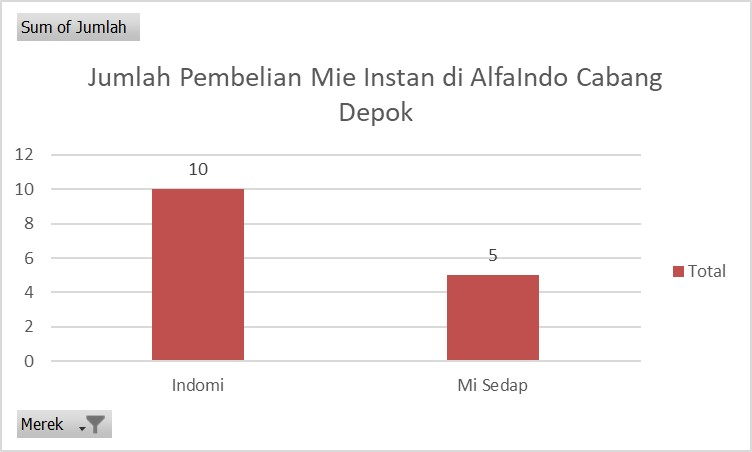

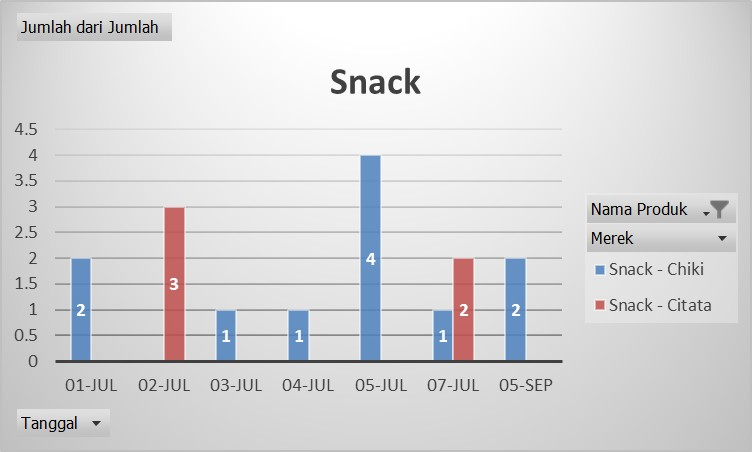

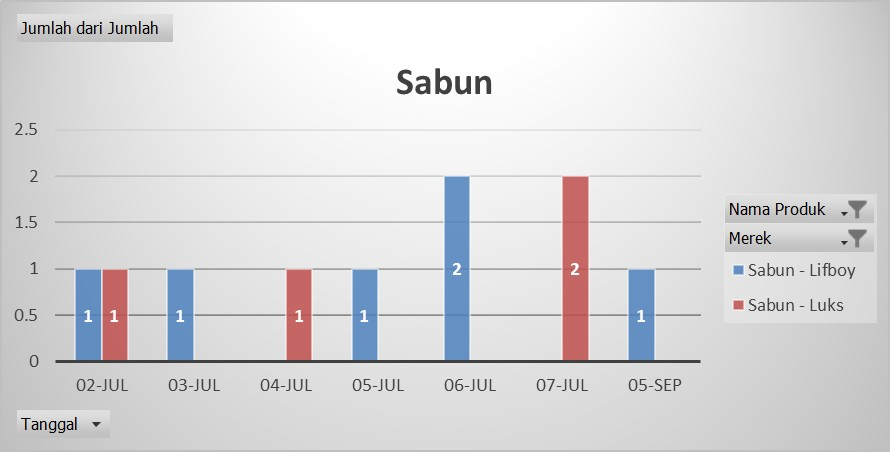

Didapat beberapa kesimpulan sebagai berikut: 
- Roti : 
  Orang-orang yang berbelanja pada toko Alfando cabang Depok, cenderung lebih   membeli roti Sri-Roti dibandingkan dengan merek Prambanan. Hal ini memberikan input bahwa lebih baik roti merek Prambanan dijadikan *bundling* (penjualan paket) dengan produk-produk yang memiliki peminat lebih tinggi. 
- Air Minum : 
    Orang-orang yang berbelanja pada toko Alfando cabang Depok, cenderung lebih memilih untuk membeli Sprite dibandingkan dengan Aquos, dimana perbedaan penjualan keduanya cukup signifikan. 
- Mie Instan: Orang-orang yang berbelanja pada toko Alfando cabang Depok, cenderung lebih memilih Indomi dibandingkan dengan Mie Sedap, dimana perbandingan perbedaan keduanya cukup signifikan. 
- Snack :     Orang-orang yang berbelanja pada toko Alfando cabang Depok, cenderung lebih memilih untuk membeli Chiki dibandingkan dengan Citata, hal ini dapat dilihat dengan perbandingan penjualan keduanya (Chiki = 10 dan Citata = 5), sehingga perbedaan keduanya cukup signifikan. 
- Sabun : Orang-orang yang berbelanja pada toko Alfando cabang Depok cenderung untuk membeli sabun Lifeboy dibandigkan dengan sabun Luks. Namun, hal ini tidak terlalu signifikan perbedaannya, sehingga dapat diasumsikan penjualan kedua produk tidak terlalu berbeda jauh (seimbang). 


Namun, kami menemukan terdapat kejanggalan pada data transaksi toko Alfando cabang Depok. Hal ini kami visualisasikan dalam bentuk grafik sebagai berikut, 


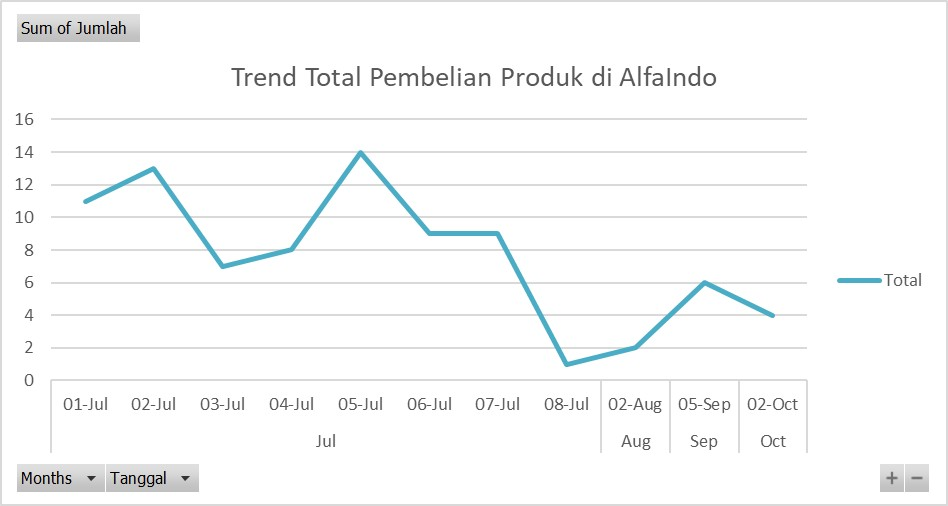

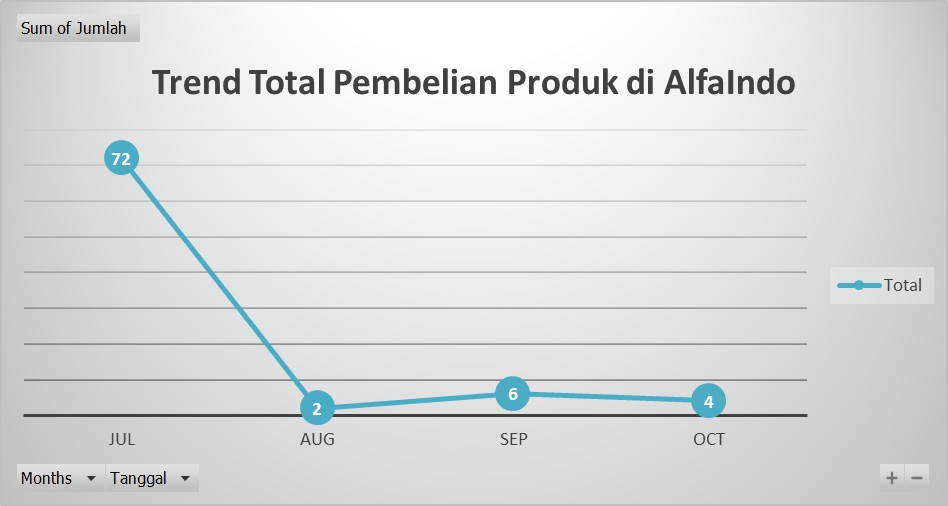

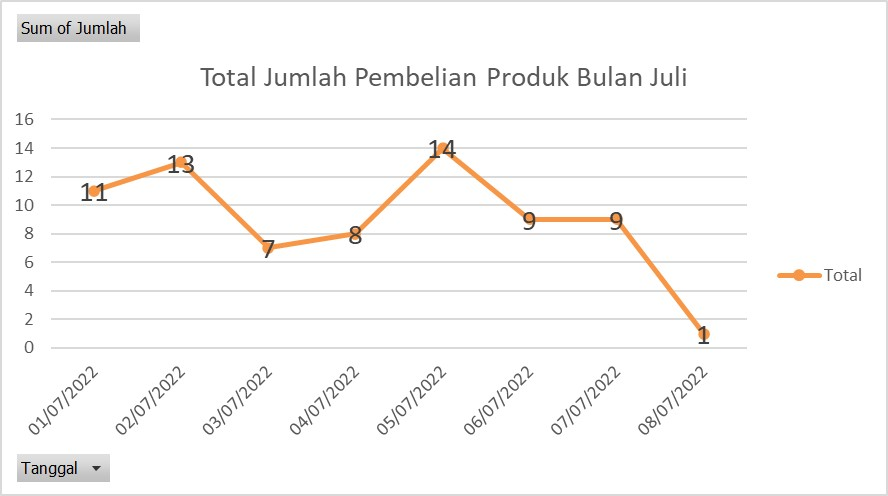

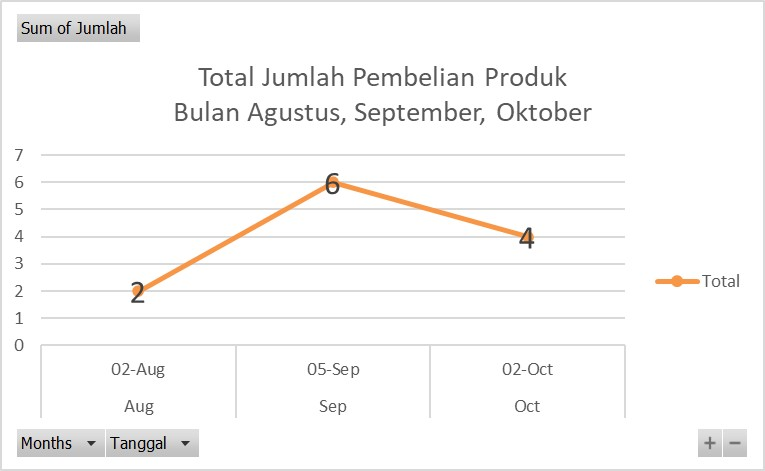

Terdapat penurunan total penjualan yang signifikan bulan Agustus, September, dan Oktober jika dibandingkan dengan total penjualan di bulan Juli. Hal ini dapat dilihat pada gambar yaitu pencatatan bulan Juli berhenti di tanggal 8 Juli, dan dimulai lagi pada bulan Agustus tanggal 2, lalu berikutnya dilanjutkan pada bulan September tanggal 5 dan terakhir pencatatan dilakukan tanggal 8 Oktober. Sedangkan pada bulan Juli (tangggal 2-7), toko Alfando cabang Depok masih melakukan penjualan dengan rata-rata 10 item per hari dimana jika dibandingkan dengan akumulasi penjualan pada bulan Agustus, September, dan Oktber hanya mencapai 12 item. Hal ini harus diperhatikan, mengingat penurunan penjualan yang dialami oleh toko Alfando janggal (tidak ada pencatatan penjualan setelah tanggal 8 Juli) dan perlu dilakukan evaluasi lebih lanjut. 

Terdapat beberapa langkah antisipasi yang dapat dilakukan, yaitu: 
1. Melakukan audit secara keseluruhan terkait jam operasional dari toko tersebut 
2. Melakukan pengecekan terhadap sistem kasir dan cctv pada toko yang bersangkutan 
3. Melihat stok barang dan stok pembelian barang yang dilakukan toko Alfando (apakah pembelian barang (stok) dan penjualan yang dilakukan oleh toko Alfando sama) 
4. Melakukan evaluasi internal terhadap toko Alfando cabang Depok
5. Penerapan SOP secara tegas untuk karyawan-karyawan di toko Alfando

Akan diasumsikan bahwa data bulan Juli sudah cukup baik. Akan dilihat pelanggan-pelanggan yang pernah membeli barang di toko Alfando. Didapatkan grafik sebagai berikut. 

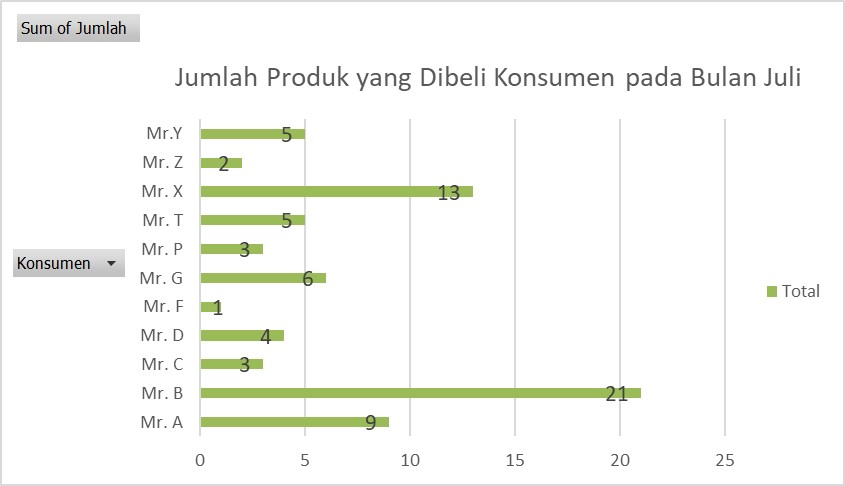

Didapatkan bahwa terdapat beberapa pelanggan yang cukup setia dalam memberli produk di toko Alfando cabang Depok seperti Mr. X dan Mr. B. Hal ini dapat ditingkatkan dan diberikan reward berupa sistem "kartu member", seperti dengan membeli barang kelipatan 50.000 akan mendapatkan 1 poin, dan setiap 2 poin dapat melakukan "tebus murah" untuk beberapa barang dengan harga diskon sebesar 30% (asumsikan sudah dihitung keuntungan bersih). Hal ini dapat meningkatkan penjualan dan kesetiaan dari pembeli barang. Selain itu, didekat kasir juga dapat ditaruh barang-barang dengan harga kurang dari 10.000, supaya jika pembeli membeli barang (kurang sedikit dari kelipatan 50.000), dapat ditawarkan oleh pihak kasir untuk menambah pembelian mereka hingga mencapai kelipatan 50.000. 

Berikut akan ditampilkan visualisasi trend penjualan barang pada bulan Juli 2022. 

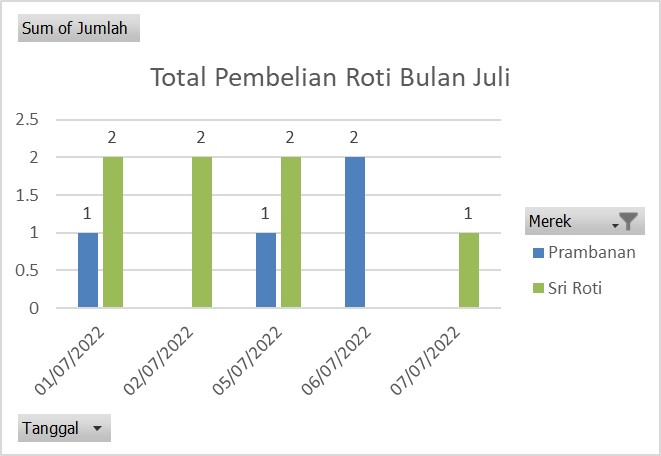

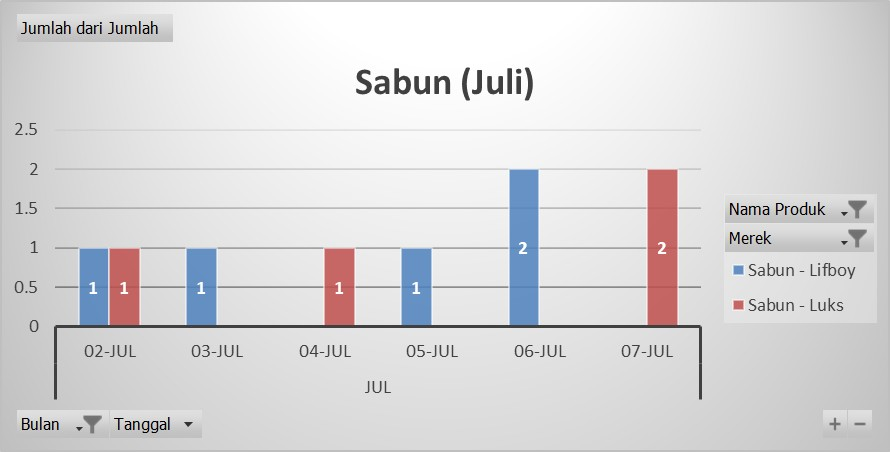

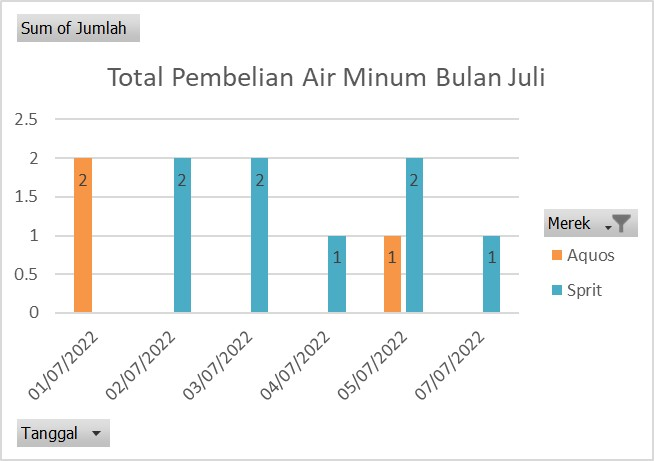

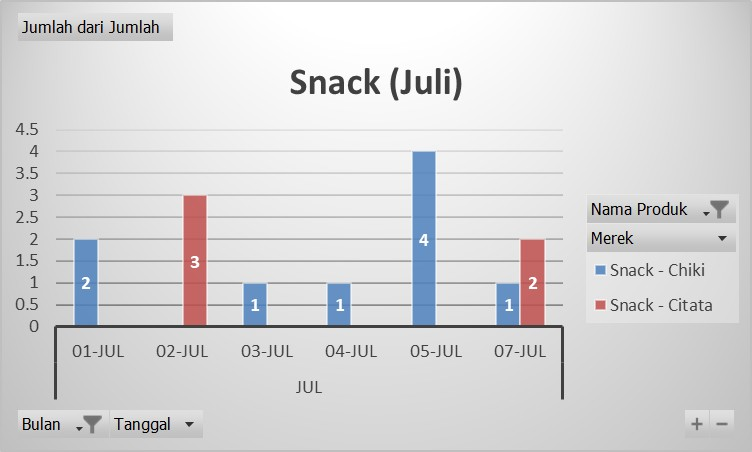

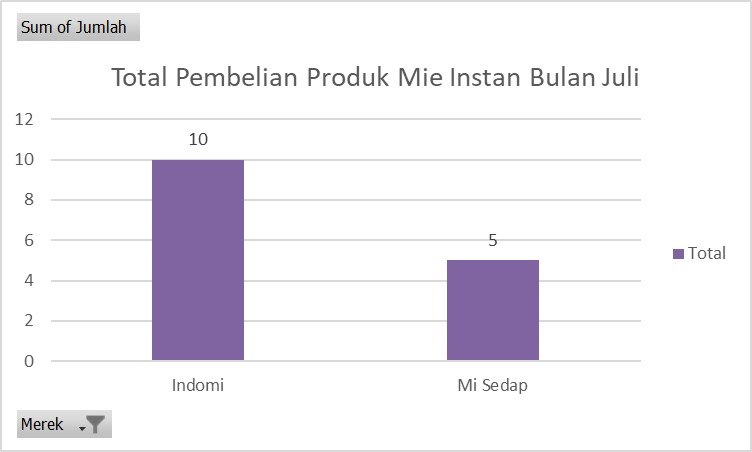

Dapat dilihat secara keseluruhan perbandingan penjualan tidak berubah. Hal ini dikarenakan data transaksi didominasi oleh data transaksi bulan Juli. 

# Market Basket Analysis 

Untuk meningkatkan pendapatan dari toko Alfando cabang Depok, akan dilihat beberapa kombinasi barang yang dijual menggunakan Market Basket Analysis. 

# Semua bulan (Juli-Agustus-September-Oktober)

Pengelompokan berdasarkan **Nama Produk **

In [6]:
# Group the transaction
x = (df.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah']).sum()
x.head(20)

ID Transaksi  Nama Produk
1             Air Minum      1
              Mie Instan     3
              Roti           2
2             Air Minum      1
              Roti           1
              Shampoo        1
              Snack          2
3             Rokok          1
              Sabun          1
              Shampoo        1
4             Air Minum      2
              Mie Instan     2
              Roti           2
              Sabun          1
              Snack          3
5             Air Minum      2
              Snack          1
6             Mie Instan     2
              Sabun          1
              Shampoo        1
Name: Jumlah, dtype: int64

In [7]:
basket = df.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah']
basket.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
49    2
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [8]:
# jumlahkan, unstack, null = 0, index baris menggunakan nomor invoice
basket = basket.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1.0,3.0,0.0,2.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,2.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2.0,2.0,0.0,2.0,1.0,0.0,3.0
5,2.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units) # one-hot encoding
basket_sets.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1,1,0,1,0,0,0
2,1,0,0,1,0,1,1
3,0,0,1,0,1,1,0
4,1,1,0,1,1,0,1
5,1,0,0,0,0,0,1


In [10]:
basket_sets.columns

Index(['Air Minum', 'Mie Instan', 'Rokok', 'Roti', 'Sabun', 'Shampoo',
       'Snack'],
      dtype='object', name='Nama Produk')

In [11]:
basket_sets.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64', name='ID Transaksi')

In [12]:
## Kesimpulan untuk data ID Transaksi = 1
basket_sets.iloc[0]

Nama Produk
Air Minum     1
Mie Instan    1
Rokok         0
Roti          1
Sabun         0
Shampoo       0
Snack         0
Name: 1, dtype: int64

In [13]:
basket_sets.iloc[0].sum()

3

In [14]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
0,0.611111,(Air Minum)
3,0.500000,(Roti)
6,0.500000,(Snack)
4,0.444444,(Sabun)
9,0.444444,"(Roti, Air Minum)"
11,0.388889,"(Air Minum, Snack)"
27,0.333333,"(Roti, Air Minum, Snack)"
5,0.333333,(Shampoo)
1,0.333333,(Mie Instan)
19,0.333333,"(Roti, Snack)"


In [15]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
154,"(Mie Instan, Roti, Snack)","(Sabun, Air Minum)",0.111111,0.166667,0.111111,1.000000,6.000000,0.092593,inf
161,"(Sabun, Roti)","(Mie Instan, Air Minum, Snack)",0.166667,0.111111,0.111111,0.666667,6.000000,0.092593,2.666667
167,"(Sabun, Air Minum)","(Mie Instan, Roti, Snack)",0.166667,0.111111,0.111111,0.666667,6.000000,0.092593,2.666667
160,"(Mie Instan, Air Minum, Snack)","(Sabun, Roti)",0.111111,0.166667,0.111111,1.000000,6.000000,0.092593,inf
81,"(Sabun, Roti)","(Mie Instan, Snack)",0.166667,0.166667,0.111111,0.666667,4.000000,0.083333,2.500000
95,"(Sabun, Air Minum)","(Mie Instan, Snack)",0.166667,0.166667,0.111111,0.666667,4.000000,0.083333,2.500000
94,"(Mie Instan, Snack)","(Sabun, Air Minum)",0.166667,0.166667,0.111111,0.666667,4.000000,0.083333,2.500000
151,"(Sabun, Roti, Snack)","(Mie Instan, Air Minum)",0.166667,0.166667,0.111111,0.666667,4.000000,0.083333,2.500000
170,"(Mie Instan, Air Minum)","(Sabun, Roti, Snack)",0.166667,0.166667,0.111111,0.666667,4.000000,0.083333,2.500000
80,"(Mie Instan, Snack)","(Sabun, Roti)",0.166667,0.166667,0.111111,0.666667,4.000000,0.083333,2.500000


Berdasarkan hasil ini, dapat terlihat bahwa lift paling besar didapat oleh baris nomor 1,2,3, dan 4 dimana nilai lift yang didapat adalah 6. Keempat baris ini merupakan kombinasi dari Mie Instan, Roti, Snack, Air Minum, dan Sabun dimana dapat dikelompokan menjadi kelompok kebutuhan pokok. Dari hal ini, dapat dilihat juga bahwa nilai *support* yang didapat dari masing-masing item cukup tinggi (Air Minum =0.611, Roti = 0.5, Snack = 0.5, Sabun= 0.4, dan Mie Instan = 0.33. Dari hal ini, kami merekomendasikan untuk memisah barang-barang tersebut ke beberapa titik supaya pelanggan dapat memutari toko untuk membeli barang-barang tersebut. 

Namun, hal ini saja belum cukup. Kami akan mencoba untuk melihat keterkaitan pembelian satu sama lain melalu merek barang. 

Pengelompokan berdasarkan *Merek*

In [16]:
# Group the merk
x = (df.groupby(['ID Transaksi', 'Merek'])['Jumlah']).sum()
x.head(20)

ID Transaksi  Merek    
1             Aquos        1
              Indomi       2
              Mi Sedap     1
              Sri Roti     2
2             Aquos        1
              Chiki        2
              Clean        1
              Prambanan    1
3             Clean        1
              Lifboy       1
              Malioboro    1
4             Citata       3
              Luks         1
              Mi Sedap     2
              Sprit        2
              Sri Roti     2
5             Chiki        1
              Sprit        2
6             Clean        1
              Indomi       2
Name: Jumlah, dtype: int64

In [17]:
basket1 = df.groupby(['ID Transaksi', 'Merek'])['Jumlah']
basket1.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
49    2
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [18]:
# jumlahkan, unstack, null = 0, index baris menggunakan nomor invoice
basket1 = basket1.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket1.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [19]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets1 = basket1.applymap(encode_units) # one-hot encoding
basket_sets1.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,1,0,0,1
2,1,1,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,1,1
5,0,1,0,0,0,0,0,0,0,0,1,0


In [20]:
basket_sets1.columns

Index(['Aquos', 'Chiki', 'Citata', 'Clean', 'Indomi', 'Lifboy', 'Luks',
       'Malioboro', 'Mi Sedap', 'Prambanan', 'Sprit', 'Sri Roti'],
      dtype='object', name='Merek')

In [21]:
basket_sets1.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64', name='ID Transaksi')

In [22]:
basket_sets1.iloc[0]

Merek
Aquos        1
Chiki        0
Citata       0
Clean        0
Indomi       1
Lifboy       0
Luks         0
Malioboro    0
Mi Sedap     1
Prambanan    0
Sprit        0
Sri Roti     1
Name: 1, dtype: int64

In [23]:
basket_sets1.iloc[0].sum()

4

In [24]:
frequent_itemsets1 = apriori(basket_sets1, min_support=0.07, use_colnames=True)
frequent_itemsets1.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets1

,support,itemsets
1,0.388889,(Chiki)
3,0.333333,(Clean)
10,0.333333,(Sprit)
11,0.333333,(Sri Roti)
0,0.277778,(Aquos)
4,0.277778,(Indomi)
5,0.277778,(Lifboy)
7,0.277778,(Malioboro)
16,0.166667,"(Chiki, Clean)"
28,0.166667,"(Lifboy, Indomi)"


In [25]:
rules1= association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules1.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
99,"(Lifboy, Aquos)","(Chiki, Sri Roti)",0.111111,0.111111,0.111111,1.000000,9.0,0.098765,inf
94,"(Chiki, Sri Roti)","(Lifboy, Aquos)",0.111111,0.111111,0.111111,1.000000,9.0,0.098765,inf
26,(Citata),"(Sri Roti, Sprit)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
98,"(Sri Roti, Aquos)","(Chiki, Lifboy)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
97,"(Lifboy, Sri Roti)","(Chiki, Aquos)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
96,"(Chiki, Aquos)","(Lifboy, Sri Roti)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
95,"(Chiki, Lifboy)","(Sri Roti, Aquos)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
23,"(Sri Roti, Sprit)",(Citata),0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
28,"(Chiki, Clean)",(Luks),0.166667,0.166667,0.111111,0.666667,4.0,0.083333,2.500000
33,(Luks),"(Chiki, Clean)",0.166667,0.166667,0.111111,0.666667,4.0,0.083333,2.500000


Dari visualisasi ini, didapatkan kesimpulan sebagai berikut: 
1. Dapat ditawarkan paket *bundling* dengan tema "paket ngumpul nyamil bersama" untuk Citata, Sprit, Sari Roti (baris 3, lift = 6) dengan mie instan (disarankan mie sedap, dimanaa support =0.167 (termasuk support yang rendah)) untuk meningkatkan penjualan. 
2. Diasumsikan telah dihitung keuntungan bersih, dapat dibuat promo untuk Chicki, Clean, dan Luks (lift =4) dimana promo tersebut dapat berupa beli Clean + Lucks, mendapatkan kesempatan untuk membeli Chicki dengan promo (buy 1 get 1) 

### Terkhusus Bulan Juli 

Pengelompokan berdasarkan *Nama Produk *

In [27]:
df1 = df.drop([49,50,51,52,53,54,55])
df1

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,2022-07-01,Mr. A,1,Roti,Sri Roti,2
1,1,2022-07-01,Mr. A,2,Air Minum,Aquos,1
2,1,2022-07-01,Mr. A,11,Mie Instan,Indomi,2
3,1,2022-07-01,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,2022-07-01,Mr. B,2,Air Minum,Aquos,1
5,2,2022-07-01,Mr. B,6,Snack,Chiki,2
6,2,2022-07-01,Mr. B,3,Roti,Prambanan,1
7,2,2022-07-01,Mr. B,5,Shampoo,Clean,1
8,3,2022-07-02,Mr. C,4,Sabun,Lifboy,1
9,3,2022-07-02,Mr. C,5,Shampoo,Clean,1


In [28]:
# Group the transaction
x2 = (df1.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah']).sum()
x2.head(20)

ID Transaksi  Nama Produk
1             Air Minum      1
              Mie Instan     3
              Roti           2
2             Air Minum      1
              Roti           1
              Shampoo        1
              Snack          2
3             Rokok          1
              Sabun          1
              Shampoo        1
4             Air Minum      2
              Mie Instan     2
              Roti           2
              Sabun          1
              Snack          3
5             Air Minum      2
              Snack          1
6             Mie Instan     2
              Sabun          1
              Shampoo        1
Name: Jumlah, dtype: int64

In [29]:
basket2 = df1.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah']
basket2.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
Name: Jumlah, dtype: int64

In [30]:
# jumlahkan, unstack, null = 0, index baris menggunakan nomor invoice
basket2 = basket2.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket2.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1.0,3.0,0.0,2.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,2.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2.0,2.0,0.0,2.0,1.0,0.0,3.0
5,2.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets2 = basket2.applymap(encode_units) # one-hot encoding
basket_sets2.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1,1,0,1,0,0,0
2,1,0,0,1,0,1,1
3,0,0,1,0,1,1,0
4,1,1,0,1,1,0,1
5,1,0,0,0,0,0,1


In [32]:
basket_sets2.columns

Index(['Air Minum', 'Mie Instan', 'Rokok', 'Roti', 'Sabun', 'Shampoo',
       'Snack'],
      dtype='object', name='Nama Produk')

In [33]:
basket_sets2.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64', name='ID Transaksi')

In [34]:
basket_sets2.iloc[0]

Nama Produk
Air Minum     1
Mie Instan    1
Rokok         0
Roti          1
Sabun         0
Shampoo       0
Snack         0
Name: 1, dtype: int64

In [35]:
basket_sets2.iloc[0].sum()

3

In [49]:
frequent_itemsets2 = apriori(basket_sets2, min_support=0.07, use_colnames=True)
frequent_itemsets2.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets2

,support,itemsets
0,0.533333,(Air Minum)
6,0.533333,(Snack)
3,0.466667,(Roti)
4,0.466667,(Sabun)
11,0.400000,"(Air Minum, Snack)"
5,0.400000,(Shampoo)
1,0.400000,(Mie Instan)
9,0.400000,"(Roti, Air Minum)"
27,0.333333,"(Roti, Air Minum, Snack)"
19,0.333333,"(Roti, Snack)"


In [50]:
rules2= association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules2.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules2.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
161,"(Sabun, Air Minum)","(Mie Instan, Roti, Snack)",0.133333,0.133333,0.133333,1.000000,7.5,0.115556,inf
148,"(Mie Instan, Roti, Snack)","(Sabun, Air Minum)",0.133333,0.133333,0.133333,1.000000,7.5,0.115556,inf
154,"(Mie Instan, Air Minum, Snack)","(Sabun, Roti)",0.133333,0.133333,0.133333,1.000000,7.5,0.115556,inf
155,"(Sabun, Roti)","(Mie Instan, Air Minum, Snack)",0.133333,0.133333,0.133333,1.000000,7.5,0.115556,inf
152,"(Sabun, Air Minum, Snack)","(Mie Instan, Roti)",0.133333,0.200000,0.133333,1.000000,5.0,0.106667,inf
147,"(Sabun, Roti, Air Minum)","(Mie Instan, Snack)",0.133333,0.200000,0.133333,1.000000,5.0,0.106667,inf
92,"(Mie Instan, Snack)","(Sabun, Roti)",0.200000,0.133333,0.133333,0.666667,5.0,0.106667,2.600000
157,"(Mie Instan, Roti)","(Sabun, Air Minum, Snack)",0.200000,0.133333,0.133333,0.666667,5.0,0.106667,2.600000
105,"(Mie Instan, Roti)","(Sabun, Air Minum)",0.200000,0.133333,0.133333,0.666667,5.0,0.106667,2.600000
61,"(Sabun, Air Minum)","(Mie Instan, Snack)",0.133333,0.200000,0.133333,1.000000,5.0,0.106667,inf


Dari hasil ini, dapat terlihat bahwa frekuensi penjualan rokok meningkat (support dari rokok), sehingga terdapat perbedaan *trend* penjualan rokok pada bulan Juli. Selain itu, dapat terlihat perbedaan support pada produk Shampoo, dan dapat terlihat bahwa terdapat perbedaan *trend* penjualan shampoo pada bulan Juli. 

Secara keseluruhan, dapat terlihat bahwa penjualan Shampoo dan Rokok hanya terdapat dibulan Juli, dan nilai perubahaan yang didapat oleh support keduanya juga berubah. Dapat terlihat bahwa penjualan keduanya juga berdampak, namun dibulan Agustus, September, dan Oktober, tidak ada penjualan dari kedua barang tersebut. 

Pengelompokan berdasarkan *Merek*

In [38]:
# Group the merk
xm = (df1.groupby(['ID Transaksi', 'Merek'])['Jumlah']).sum()
xm.head(20)

ID Transaksi  Merek    
1             Aquos        1
              Indomi       2
              Mi Sedap     1
              Sri Roti     2
2             Aquos        1
              Chiki        2
              Clean        1
              Prambanan    1
3             Clean        1
              Lifboy       1
              Malioboro    1
4             Citata       3
              Luks         1
              Mi Sedap     2
              Sprit        2
              Sri Roti     2
5             Chiki        1
              Sprit        2
6             Clean        1
              Indomi       2
Name: Jumlah, dtype: int64

In [39]:
basketm = df1.groupby(['ID Transaksi', 'Merek'])['Jumlah']
basketm.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
Name: Jumlah, dtype: int64

In [40]:
# jumlahkan, unstack, null = 0, index baris menggunakan nomor invoice
basketm = basketm.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basketm.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [41]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_setsm = basketm.applymap(encode_units) # one-hot encoding
basket_setsm.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,1,0,0,1
2,1,1,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,1,1
5,0,1,0,0,0,0,0,0,0,0,1,0


In [42]:
basket_setsm.columns

Index(['Aquos', 'Chiki', 'Citata', 'Clean', 'Indomi', 'Lifboy', 'Luks',
       'Malioboro', 'Mi Sedap', 'Prambanan', 'Sprit', 'Sri Roti'],
      dtype='object', name='Merek')

In [43]:
basket_setsm.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64', name='ID Transaksi')

In [44]:
basket_setsm.iloc[0]

Merek
Aquos        1
Chiki        0
Citata       0
Clean        0
Indomi       1
Lifboy       0
Luks         0
Malioboro    0
Mi Sedap     1
Prambanan    0
Sprit        0
Sri Roti     1
Name: 1, dtype: int64

In [45]:
basket_setsm.iloc[0].sum()

4

In [46]:
frequent_itemsetsm = apriori(basket_setsm, min_support=0.07, use_colnames=True)
frequent_itemsetsm.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsetsm

,support,itemsets
3,0.400000,(Clean)
1,0.400000,(Chiki)
4,0.333333,(Indomi)
7,0.333333,(Malioboro)
10,0.333333,(Sprit)
11,0.266667,(Sri Roti)
5,0.266667,(Lifboy)
0,0.200000,(Aquos)
22,0.200000,"(Clean, Indomi)"
25,0.200000,"(Lifboy, Indomi)"


In [47]:
rulesm= association_rules(frequent_itemsetsm, metric="lift", min_threshold=1)
rulesm.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rulesm.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(Citata),"(Sri Roti, Sprit)",0.133333,0.133333,0.133333,1.000000,7.500000,0.115556,inf
27,"(Sri Roti, Sprit)",(Citata),0.133333,0.133333,0.133333,1.000000,7.500000,0.115556,inf
15,(Aquos),"(Sri Roti, Indomi)",0.200000,0.133333,0.133333,0.666667,5.000000,0.106667,2.600000
10,"(Sri Roti, Indomi)",(Aquos),0.133333,0.200000,0.133333,1.000000,5.000000,0.106667,inf
29,(Sri Roti),"(Citata, Sprit)",0.266667,0.133333,0.133333,0.500000,3.750000,0.097778,1.733333
28,"(Citata, Sprit)",(Sri Roti),0.133333,0.266667,0.133333,1.000000,3.750000,0.097778,inf
40,(Sri Roti),(Citata),0.266667,0.133333,0.133333,0.500000,3.750000,0.097778,1.733333
41,(Citata),(Sri Roti),0.133333,0.266667,0.133333,1.000000,3.750000,0.097778,inf
12,"(Indomi, Aquos)",(Sri Roti),0.133333,0.266667,0.133333,1.000000,3.750000,0.097778,inf
13,(Sri Roti),"(Indomi, Aquos)",0.266667,0.133333,0.133333,0.500000,3.750000,0.097778,1.733333


Dari hasil berikut, dapat terlihat bahwa sama seperti sebelumnya, yaitu Citata, Sprit dan Sri Roti memiliki keterikatan yang kuat (lift=7.5), sehingga sesuai dengan yang didapat pada saat Market Basket Analysis (bulan keseluruhan), yaitu dibutuhkan promo yang mengikat antara Citata, Sprit, dan Sri Roti seperti bundling dengan barang lain, atau cross selling dengan barang lain. 

### Rekomendasi Untuk Kedepannya

Berikut adalah rekomendasi dari kelompok kami, 
1. Menambahkan data keterangan waktu pada kolom yang terpisah dalam setiap transaksi penjualan, sehingga dapat memudahkan Data Analyst untuk menganalisis kapan waktu dimana pembeli sering melakukan pembelian dan dapat direkomendasikannya pembuatan promo di waktu-waktu tersebut 

2. Menyimpan file transaksi dalam bentuk csv, dikarenakan penyimpanan untuk file yang besar lebih baik dalam bentuk csv dibandingkan excel

3. Menambah data keterangan jenis kelamin pembeli, sehingga dapat merekomendasikan/memberi promo terhadap barang yang sering dibeli pembeli berdasarkan jenis kelamin.

4. Menambahkan data keterangan harga dan jumlah profit masing-masing produk, sehingga dapat dianalisis produk apa yang paling menghasilkan pemasukan dan profit tertinggi

5. Menambahkan data (variabel) Tipe Pelanggan (tersdiri dari tipe Member atau Non-Member), sehingga bisa mendapatkan informasi mengenai pola belanja Member dan Non-Member. Lalu, menarik pelanggan Non-Member untuk menjadi Member, dengan memberikan promo/keuntungan khusus apabila menjadi Member.
 
6. Membuat program member jika belum ada, sehingga bisa mendapatkan lebih banyak informasi/pola pembeli dalam berbelanja untuk dianalisis lebih lanjut. Selain itu, dapat diberikan juga reward kepada pelanggan yang setia (seperti reward poin yang sudah dijelaskan sebelumnya), agar toko Alfando tetap mempertahankan pelanggan setianya. 

7. Jika berdasarkan data, penjualan hanya terjadi pada awal bulan (seasonal). Hal ini tidak mungkin terjadi dalam realita dikarenakan tidak logis untuk pebisnis. Disarankan untuk melakukan evaluasi internal dari Toko Alfando dimulai dari mekanisme penjualan dan pembukaan toko, sehingga penurunan yang janggal tersebut tidak akan terjadi dikemudian hari dan dapat meningkatkan profit kedepannya. 

8. Membuat paket penjualan yang sesuai dengan keadaan toko (dengan memperhitungkan profit), diantaranya yaitu: 
- Menempatkan kebutuhan pokok secara terpisah, agar pelanggan dapat berkeliling ke satu tempat dan tempat lainnya didalam toko. 
- Menjual paket bundling dengan tema "paket ngumpul nyamil bersama" untuk Citata, Sprit, Sari Roti dengan mie instan (disarankan mie sedap) untuk meningkatkan penjualan dan daya minat dari pelanggan. 
- Membuat promo untuk Chicki, Clean, dan Luksdimana promo tersebut dapat berupa beli Clean + Lucks, mendapatkan kesempatan untuk membeli Chicki dengan promo (buy 1 get 1). 
- Mempertimbangkan untuk menjual rokok di posisi dekat kasir, agar pelanggan dapat berputar terlebih dahulu sebelum membeli rokok. 
- Meletakan Shampoo didekat Sabun, agar pelanggan dimudahkan untuk mencari produk tersebut. 

